<a href="https://colab.research.google.com/github/Rishi-gupta-data/PRODIGY_DS_03/blob/main/TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [23]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# Features and targets
X = bank_marketing.data.features
y = bank_marketing.data.targets


In [24]:
# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [25]:
# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Fit the model on training data
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

1️⃣ Evaluating the Model’s Performance
After training your model, you’ll want to measure how well it performs. You can use metrics like:

Accuracy: The percentage of correct predictions.
Confusion Matrix: Shows the counts of true positives, true negatives, false positives, and false negatives.
Classification Report: Provides precision, recall, and F1-score for each class.

In [26]:
# Predict on the test set
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8767002101072653
Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.93      0.93      7952
         yes       0.49      0.49      0.49      1091

    accuracy                           0.88      9043
   macro avg       0.71      0.71      0.71      9043
weighted avg       0.88      0.88      0.88      9043

Confusion Matrix:
 [[7395  557]
 [ 558  533]]


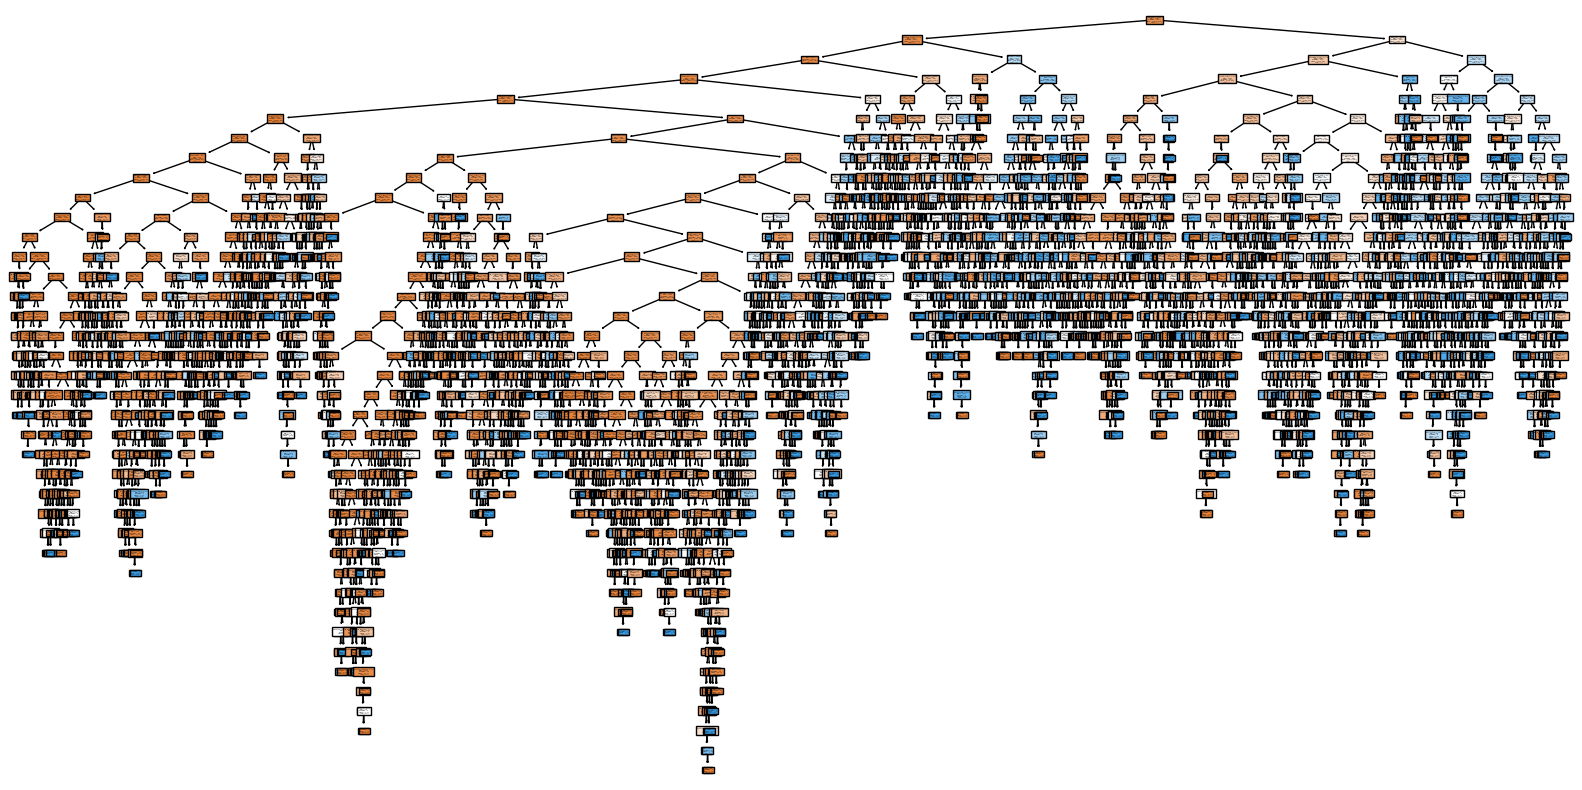

In [27]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X_train.columns, class_names=model.classes_, filled=True)
plt.show()


In [28]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Set up GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Tuned Accuracy: 0.8972686055512551
